In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import RMSprop, Adam
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
train = pd.read_csv('../data/CreditCard_train_processed.csv')
train

,LIMIT_BAL,EDUCATION,SEX_MAR,AgeBin,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,Closeness_1,Closeness_2,Closeness_3,Closeness_4,Closeness_5,Closeness_6,diff,default
0,0.010101,2,2,1,2,2,-1,-1,-2,-2,...,0.000000,0.000000,0.271688,0.291875,0.603690,0.271715,0.273931,0.235987,0.143959,1
1,0.111111,2,4,1,-1,2,-1,-1,-1,2,...,0.000000,0.003783,0.366492,0.384092,0.653686,0.362753,0.364027,0.331130,0.145013,1
2,0.080808,2,4,2,-1,-1,-1,-1,-1,-1,...,0.002392,0.009458,0.313526,0.345612,0.632833,0.324109,0.325306,0.289540,0.161379,0
3,0.040404,2,2,2,-1,-1,-1,-1,-1,-1,...,0.002557,0.001892,0.259441,0.278111,0.594200,0.273302,0.274903,0.236432,0.188944,0
4,0.040404,2,1,4,-1,-1,-1,-1,-1,-1,...,0.001648,0.001284,0.295378,0.316828,0.601064,0.280242,0.284060,0.246676,0.152974,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.070707,2,1,1,1,2,2,-1,-1,-1,...,0.004785,0.003462,0.255774,0.273967,0.593378,0.252689,0.270855,0.245965,0.230839,0
23996,0.010101,2,1,1,-1,-1,-1,-1,-1,-1,...,0.001196,0.001892,0.261823,0.280638,0.595082,0.255412,0.257956,0.218923,0.161563,0
23997,0.000000,2,2,1,-1,-1,-1,-1,-1,-1,...,0.004354,0.001892,0.257670,0.276565,0.593928,0.245827,0.249101,0.217127,0.155828,0
23998,0.010101,4,2,1,-1,-1,-1,-1,-1,-2,...,0.000000,0.000000,0.256094,0.276245,0.594148,0.234115,0.273931,0.235987,0.161992,0


In [3]:
y_train = train[['default']]
y_train = to_categorical(y_train, num_classes = 2) # make it as a categorial one-hot vector
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [4]:
X_train = train.drop(['default'], axis=1)
X_train

,LIMIT_BAL,EDUCATION,SEX_MAR,AgeBin,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,Closeness_1,Closeness_2,Closeness_3,Closeness_4,Closeness_5,Closeness_6,diff
0,0.010101,2,2,1,2,2,-1,-1,-2,-2,...,0.000000,0.000000,0.000000,0.271688,0.291875,0.603690,0.271715,0.273931,0.235987,0.143959
1,0.111111,2,4,1,-1,2,-1,-1,-1,2,...,0.002012,0.000000,0.003783,0.366492,0.384092,0.653686,0.362753,0.364027,0.331130,0.145013
2,0.080808,2,4,2,-1,-1,-1,-1,-1,-1,...,0.002012,0.002392,0.009458,0.313526,0.345612,0.632833,0.324109,0.325306,0.289540,0.161379
3,0.040404,2,2,2,-1,-1,-1,-1,-1,-1,...,0.002213,0.002557,0.001892,0.259441,0.278111,0.594200,0.273302,0.274903,0.236432,0.188944
4,0.040404,2,1,4,-1,-1,-1,-1,-1,-1,...,0.018109,0.001648,0.001284,0.295378,0.316828,0.601064,0.280242,0.284060,0.246676,0.152974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.070707,2,1,1,1,2,2,-1,-1,-1,...,0.005324,0.004785,0.003462,0.255774,0.273967,0.593378,0.252689,0.270855,0.245965,0.230839
23996,0.010101,2,1,1,-1,-1,-1,-1,-1,-1,...,0.001219,0.001196,0.001892,0.261823,0.280638,0.595082,0.255412,0.257956,0.218923,0.161563
23997,0.000000,2,2,1,-1,-1,-1,-1,-1,-1,...,0.000644,0.004354,0.001892,0.257670,0.276565,0.593928,0.245827,0.249101,0.217127,0.155828
23998,0.010101,4,2,1,-1,-1,-1,-1,-1,-2,...,0.002012,0.000000,0.000000,0.256094,0.276245,0.594148,0.234115,0.273931,0.235987,0.161992


In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((21600, 29), (2400, 29), (21600, 2), (2400, 2))

In [6]:
model = Sequential()

model.add(Dense(256, activation = "relu", input_shape=(29,)))
model.add(Dropout(0.25))

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.25))

model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.25))

model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.25))

model.add(Dense(16, activation = "relu"))

model.add(Dense(2, activation = "softmax"))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               7680      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

In [8]:
optimizer = Adam(lr=0.001)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [9]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [10]:
epochs = 50
batch_size = 64

# Early Stopping
# This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.
callback = EarlyStopping(monitor='loss', patience=3)

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (X_val, y_val), verbose = 2, callbacks=[callback])

Train on 21600 samples, validate on 2400 samples
Epoch 1/50
 - 1s - loss: 0.4852 - accuracy: 0.7927 - val_loss: 0.4434 - val_accuracy: 0.8108
Epoch 2/50
 - 1s - loss: 0.4639 - accuracy: 0.8053 - val_loss: 0.4421 - val_accuracy: 0.8263
Epoch 3/50
 - 1s - loss: 0.4589 - accuracy: 0.8106 - val_loss: 0.4342 - val_accuracy: 0.8213
Epoch 4/50
 - 1s - loss: 0.4544 - accuracy: 0.8114 - val_loss: 0.4321 - val_accuracy: 0.8229
Epoch 5/50
 - 1s - loss: 0.4550 - accuracy: 0.8127 - val_loss: 0.4317 - val_accuracy: 0.8233
Epoch 6/50
 - 1s - loss: 0.4524 - accuracy: 0.8131 - val_loss: 0.4357 - val_accuracy: 0.8271
Epoch 7/50
 - 1s - loss: 0.4486 - accuracy: 0.8147 - val_loss: 0.4338 - val_accuracy: 0.8258
Epoch 8/50
 - 1s - loss: 0.4506 - accuracy: 0.8136 - val_loss: 0.4292 - val_accuracy: 0.8263
Epoch 9/50
 - 1s - loss: 0.4486 - accuracy: 0.8148 - val_loss: 0.4315 - val_accuracy: 0.8275
Epoch 10/50
 - 1s - loss: 0.4466 - accuracy: 0.8147 - val_loss: 0.4288 - val_accuracy: 0.8271
Epoch 11/50
 - 1s - 

In [11]:
model.save('../data/ann_weights')

In [12]:
import matplotlib.pyplot as plt

W1230 03:52:25.160150 4659105280 __init__.py:820] Duplicate key in file '/Users/toeun_kim/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')


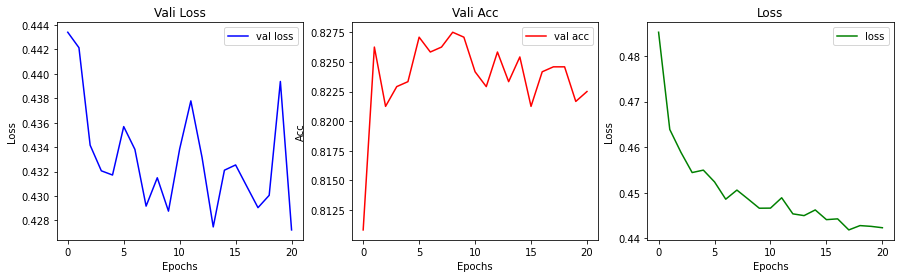

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes[0].plot(history.history['val_loss'], color='b', label="val loss")
axes[0].set_title("Vali Loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

axes[1].plot(history.history['val_accuracy'], color='r', label="val acc")
axes[1].set_title("Vali Acc")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Acc")
axes[1].legend()

axes[2].plot(history.history['loss'], color='green', label="loss")
axes[2].set_title("Loss")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Loss")
axes[2].legend()

plt.show()

In [14]:
test = pd.read_csv('../data/CreditCard_test_processed.csv')
test

,LIMIT_BAL,EDUCATION,SEX_MAR,AgeBin,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,Closeness_1,Closeness_2,Closeness_3,Closeness_4,Closeness_5,Closeness_6,diff,default
0,0.051948,2,2,1,2,2,-1,-1,-1,-1,...,0.001651,0.001596,0.296318,0.272401,0.512154,0.237237,0.250794,0.232837,0.486996,0
1,0.064935,2,2,1,-1,-1,-1,-1,-1,-1,...,0.007034,0.002528,0.299436,0.273128,0.512840,0.235595,0.255447,0.234194,0.494807,1
2,0.506494,2,2,1,-1,-1,-1,-1,-1,-1,...,0.001196,0.002165,0.675499,0.668738,0.767354,0.625767,0.631084,0.634201,0.458956,0
3,0.012987,4,2,1,5,4,3,2,2,2,...,0.000000,0.000000,0.295898,0.271091,0.510845,0.231568,0.219475,0.199690,0.469373,0
4,0.051948,3,2,1,-1,-1,-2,-2,-1,-1,...,0.000469,0.000226,0.314648,0.322922,0.544108,0.281946,0.273770,0.255042,0.454298,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.272727,3,1,2,-1,-1,-1,-1,-1,-1,...,0.011723,0.002257,0.328052,0.299702,0.518808,0.365046,0.424399,0.426645,0.563615,0
5996,0.181818,3,2,3,-1,-1,-1,-1,-1,-1,...,0.000000,0.000000,0.443271,0.422299,0.607745,0.374192,0.376711,0.366505,0.450010,0
5997,0.025974,2,2,2,4,3,2,-1,-1,-1,...,0.004689,0.006998,0.323516,0.299154,0.529101,0.240518,0.229816,0.211360,0.455472,1
5998,0.090909,3,1,3,1,-1,-1,-1,-1,-1,...,0.124174,0.004072,0.377762,0.273798,0.513573,0.258866,0.293533,0.234086,0.468953,1


In [15]:
y_test = test[['default']]
X_test = test.drop(['default'], axis=1)
X_test

,LIMIT_BAL,EDUCATION,SEX_MAR,AgeBin,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,Closeness_1,Closeness_2,Closeness_3,Closeness_4,Closeness_5,Closeness_6,diff
0,0.051948,2,2,1,2,2,-1,-1,-1,-1,...,0.003227,0.001651,0.001596,0.296318,0.272401,0.512154,0.237237,0.250794,0.232837,0.486996
1,0.064935,2,2,1,-1,-1,-1,-1,-1,-1,...,0.003221,0.007034,0.002528,0.299436,0.273128,0.512840,0.235595,0.255447,0.234194,0.494807
2,0.506494,2,2,1,-1,-1,-1,-1,-1,-1,...,0.001779,0.001196,0.002165,0.675499,0.668738,0.767354,0.625767,0.631084,0.634201,0.458956
3,0.012987,4,2,1,5,4,3,2,2,2,...,0.001449,0.000000,0.000000,0.295898,0.271091,0.510845,0.231568,0.219475,0.199690,0.469373
4,0.051948,3,2,1,-1,-1,-2,-2,-1,-1,...,0.000113,0.000469,0.000226,0.314648,0.322922,0.544108,0.281946,0.273770,0.255042,0.454298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.272727,3,1,2,-1,-1,-1,-1,-1,-1,...,0.004907,0.011723,0.002257,0.328052,0.299702,0.518808,0.365046,0.424399,0.426645,0.563615
5996,0.181818,3,2,3,-1,-1,-1,-1,-1,-1,...,0.000208,0.000000,0.000000,0.443271,0.422299,0.607745,0.374192,0.376711,0.366505,0.450010
5997,0.025974,2,2,2,4,3,2,-1,-1,-1,...,0.006763,0.004689,0.006998,0.323516,0.299154,0.529101,0.240518,0.229816,0.211360,0.455472
5998,0.090909,3,1,3,1,-1,-1,-1,-1,-1,...,0.003101,0.124174,0.004072,0.377762,0.273798,0.513573,0.258866,0.293533,0.234086,0.468953


In [16]:
y_test

,default
0,0
1,1
2,0
3,0
4,0
...,...
5995,0
5996,0
5997,1
5998,1


In [17]:
trained_model = load_model('../data/ann_weights')

In [18]:
pred = trained_model.predict(X_test)
pred_classes = np.argmax(pred, axis = 1)
result = pd.Series(pred_classes, name="Label")

In [19]:
pred

array([[0.41793358, 0.5820664 ],
       [0.87295014, 0.12704988],
       [0.9244664 , 0.0755336 ],
       ...,
       [0.33759215, 0.6624079 ],
       [0.78150374, 0.21849631],
       [0.8595278 , 0.14047222]], dtype=float32)

In [20]:
pred_classes.sum()

598

In [21]:
result

0       1
1       0
2       0
3       1
4       0
       ..
5995    0
5996    0
5997    1
5998    0
5999    0
Name: Label, Length: 6000, dtype: int64

In [22]:
from sklearn.metrics import f1_score,classification_report

In [23]:
f1_score(y_test, pred_classes)

0.45922746781115886

In [24]:
print(classification_report(y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4734
           1       0.72      0.34      0.46      1266

    accuracy                           0.83      6000
   macro avg       0.78      0.65      0.68      6000
weighted avg       0.82      0.83      0.81      6000

